K-Means clustrering

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
#Load dataset
iris = datasets.load_iris()

In [2]:
#split data
from sklearn.model_selection import train_test_split
#split data set into train and test sets
data_train, data_test,target_train,target_test= train_test_split(iris.data,
iris.target, test_size = 0.20, random_state =98 )


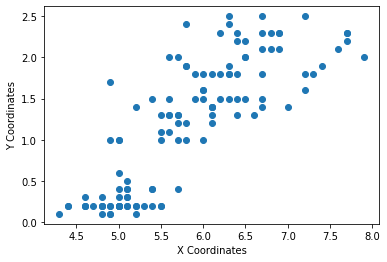

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(data_train[:, 0], data_train[:, -1])
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.show()

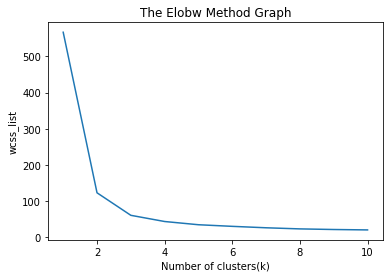

In [5]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 98)  
    kmeans.fit(data_train)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

In [6]:
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=98).fit(data_train)

In [7]:
# Get the cluster centroids
kmeans.cluster_centers_

array([[5.88125   , 2.74583333, 4.41458333, 1.45208333],
       [4.98333333, 3.42380952, 1.4547619 , 0.2452381 ],
       [6.86333333, 3.11      , 5.79      , 2.10666667]])

In [8]:
# Get the cluster labels
kmeans.labels_

array([0, 1, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 0, 1, 2, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 2, 2, 0, 0, 2, 0, 1, 2,
       0, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 0, 2, 2, 1, 0, 0, 0, 2, 1,
       2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 0, 0, 0, 1], dtype=int32)

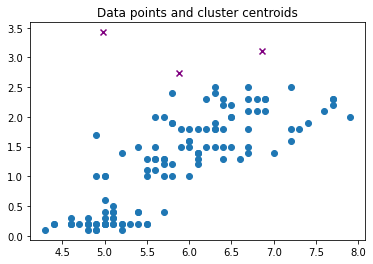

In [10]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(data_train[:, 0], data_train[:, -1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],c='purple', marker='x')
plt.title('Data points and cluster centroids')
plt.show()

In [11]:
# Calculate silhouette_score && install yellowbrick
from sklearn.metrics import silhouette_score
print(silhouette_score(data_train, kmeans.labels_))

0.570976897173972


In [ ]:
!pip install yellowbrick

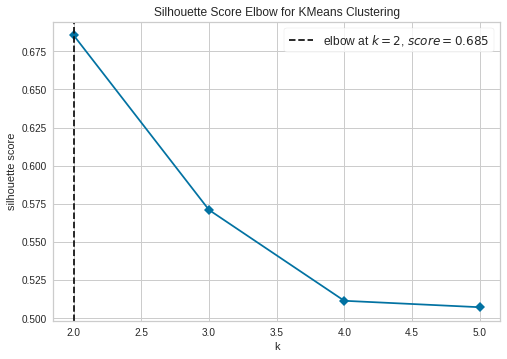

In [13]:
# Import the KElbowVisualizer method
from yellowbrick.cluster import KElbowVisualizer
# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=98)
# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette',timings=False)
# Fit the data and visualize
visualizer.fit(data_train)
visualizer.poof()

In [15]:
target_test.reshape(1,-1)
y_predict= kmeans.fit_predict(data_test) 
print(y_predict)

[0 0 0 2 1 0 0 0 2 1 2 0 0 1 0 2 2 0 0 2 0 2 1 1 2 1 1 0 2 1]


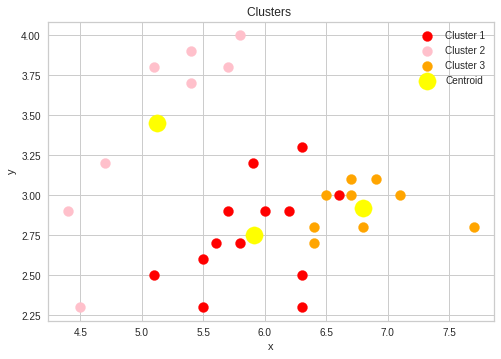

In [16]:
plt.scatter(data_test[y_predict == 0, 0], data_test[y_predict == 0, 1], s = 100, c = 'red', label = 'Cluster 1') #for first cluster  
plt.scatter(data_test[y_predict == 1, 0], data_test[y_predict == 1, 1], s = 100, c = 'pink', label = 'Cluster 2') #for second cluster  
plt.scatter(data_test[y_predict== 2, 0], data_test[y_predict == 2, 1], s = 100, c = 'orange', label = 'Cluster 3') #for third cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
plt.title('Clusters ')  
plt.xlabel('x')  
plt.ylabel('y')  
plt.legend()  
plt.show()